In [2]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore') 
%matplotlib inline

<font size=30>EDA</font>


In [5]:
data= pd.read_csv(r'/content/sample_data/winequality-red.csv')

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
print('columns: ', list(data.columns))
print('shape: ', data.shape)

columns:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
shape:  (1599, 12)


**TargetVar: quality**

[5 5 5 ... 6 5 6]
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


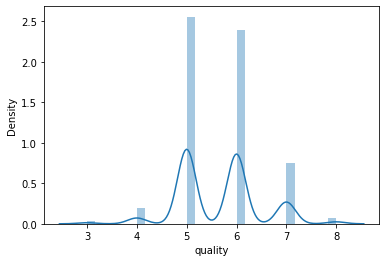

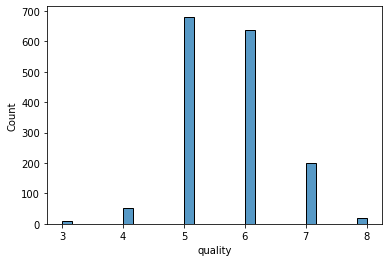

In [57]:
print(data['quality'].values)
print(data['quality'].value_counts())
sea.distplot(data['quality'])
plt.show()
sea.histplot(data=data, x='quality')

- 6 classes
- wine are mostly of quality 5 and 6
- high quality wines are vary rare

**All Features Insights**

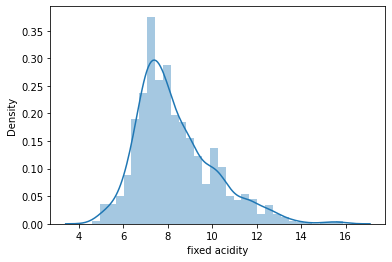

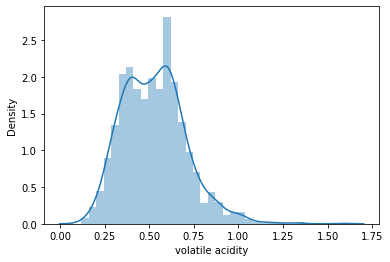

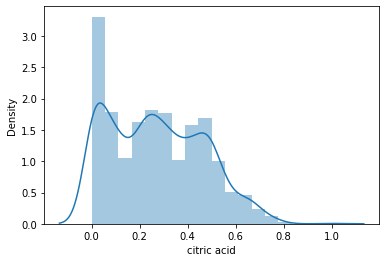

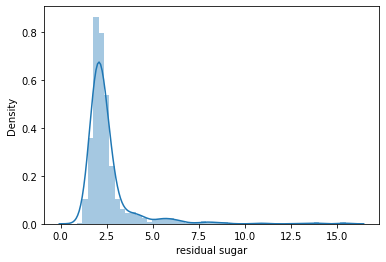

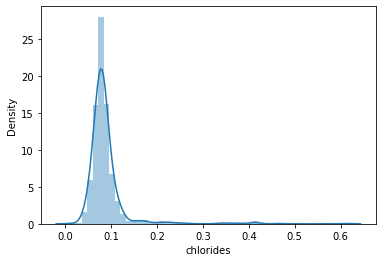

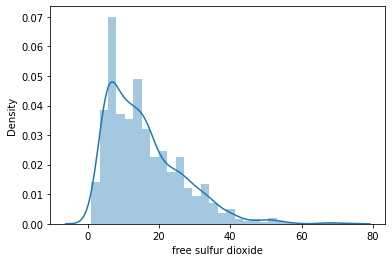

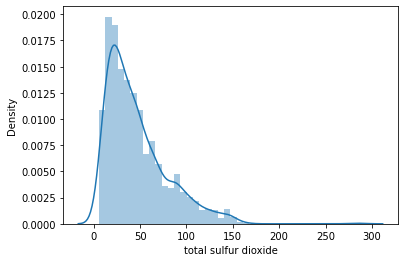

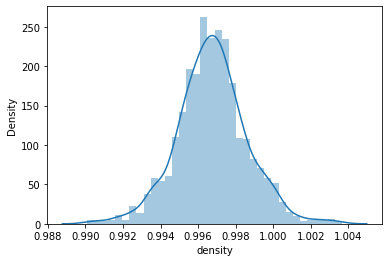

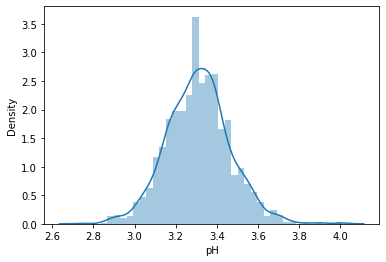

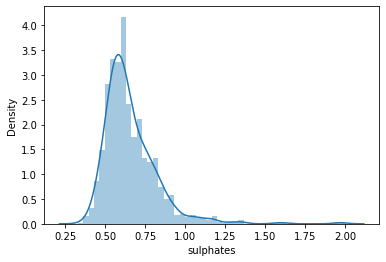

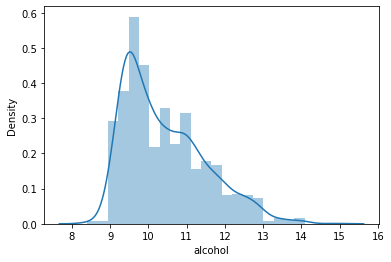

In [65]:
col_float= list(data.select_dtypes(include= 'float64').columns)
for i in col_float:
  sea.distplot(data[i])
  plt.show()

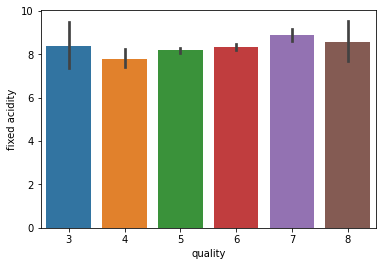

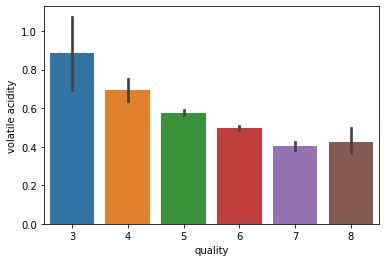

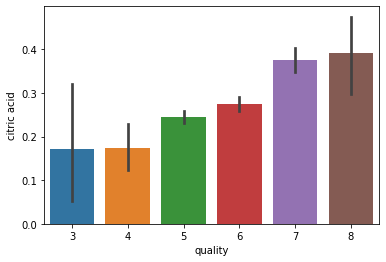

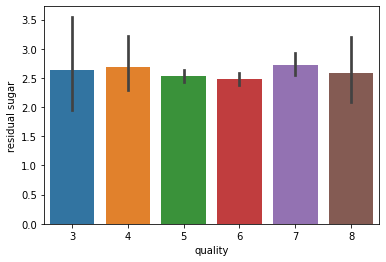

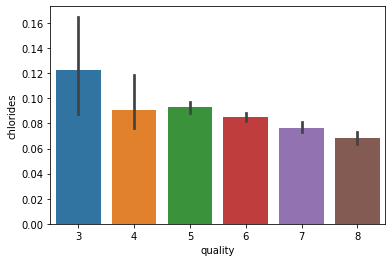

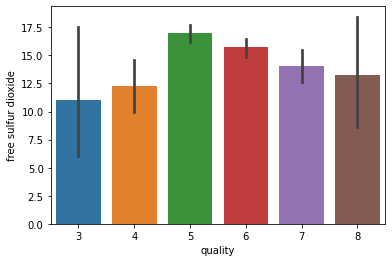

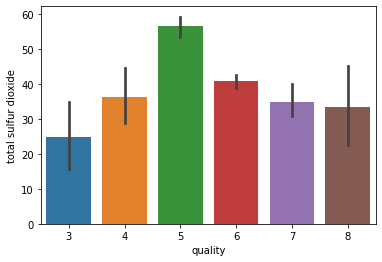

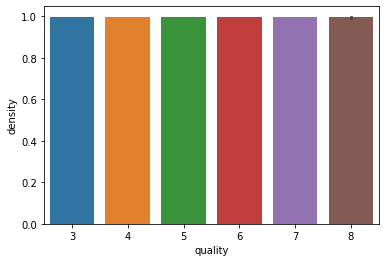

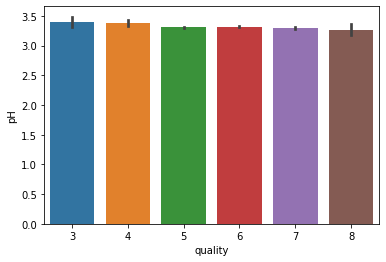

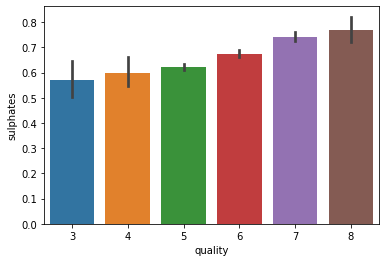

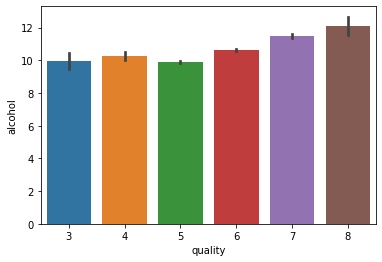

In [68]:
for i in col_float:
  sea.barplot(data= data, x='quality', y=data[i])
  plt.show()

**summary**
- high rated wines has higher alcohol, sulphates, and citric acid
- total sulfur dioxide, free sulfur dioxide left skewed.
- Citric acid is not normally distributed
- residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates have good amount of outliers
- wines with high volatile acidity, chlorides have low quality


**Before Applying the different regressors, we'll normalise our numeric columns**

We have used <u>yeo-johnson tranformation</u> for normalization

In [90]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

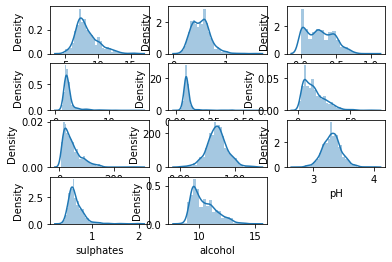

In [80]:
#before normalization
cnt=1
for i in col_float:
  plt.subplot(4,3, cnt)
  sea.distplot(data[i])
  cnt=cnt+1

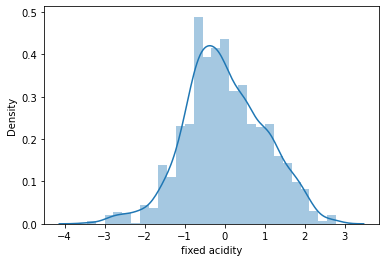

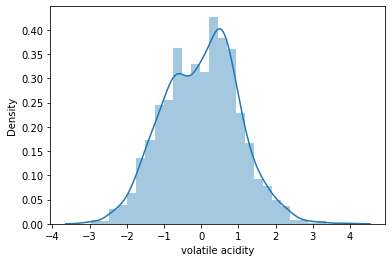

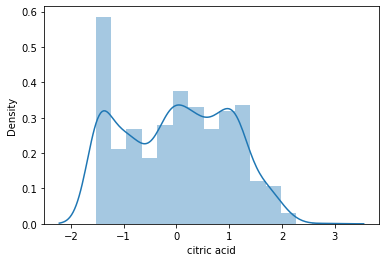

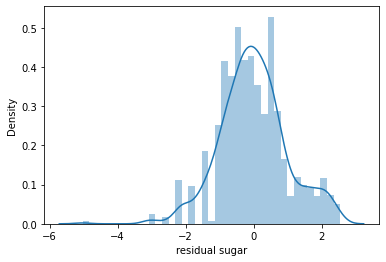

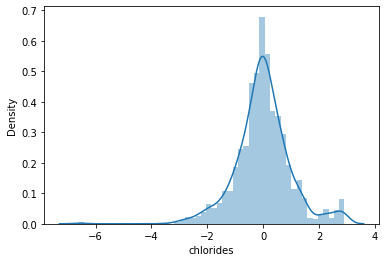

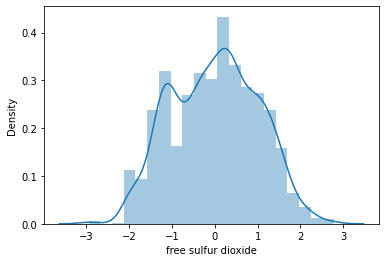

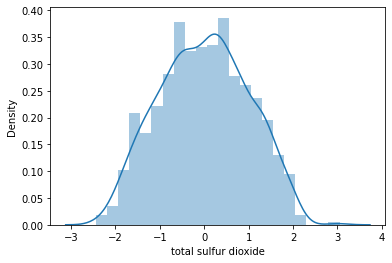

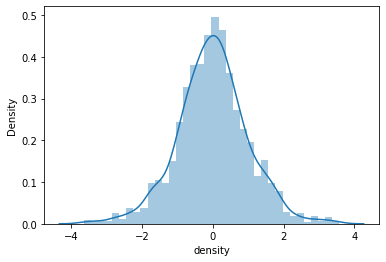

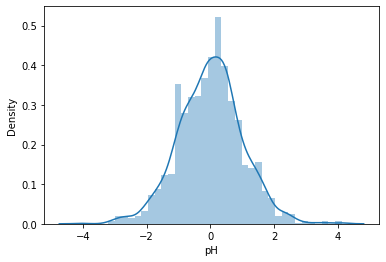

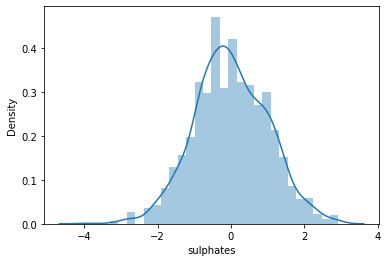

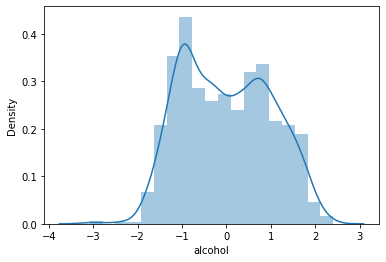

In [82]:
#after normalization
for x in col_float:
    pt = PowerTransformer(method='yeo-johnson')
    data[x] = pt.fit_transform(data[x].to_frame())
    plt.figure()
    sea.distplot(data[x])

In [83]:
#lets check how our data looks like
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,5
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860,5
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860,5
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860,6
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,5


In [85]:
target=  data['quality']
features= data.drop('quality', axis=1)

In [91]:
xtrain, xtest, ytrain, ytest= train_test_split(features, target, test_size=0.3)

**WE WILL GO FOR THE MODEL BUILDING**
- We have choosen to use regression on this problem statement(Regresser we'll going to use):
1. svm
2. knn
3. decision tree
4. random forest

**1. svm:**

**In Classification**: SVM tries to maximize the margin (to seperate the classes).

**In Regression:** SVM tries to minimize the margin, such that most of the data points are inside the margin. Remember, we are trying to approximate a function, smaller margins implies better approximation

In [73]:
#This how we import the regressor
from sklearn.svm import SVR

In [92]:
svr= SVR()
svr.fit(xtrain, ytrain)

SVR()

In [93]:
svr.score(xtrain, ytrain), svr.score(xtest, ytest)

(0.5733056460203312, 0.38817633553619135)

**2. KNN**

Once you have calculated all the distances, arranged them in ascending order, and then selected the top K neighbors.

In **Classification**: You take mode of the dependent variable (categorical target) of the top K-neighbors.

In **Regression**: You take mean of the dependent variable (continous target) of the top K-neighbors.

In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [99]:
knnr= KNeighborsRegressor()
knnr.fit(xtrain, ytrain)
knnr.score(xtrain, ytrain), knnr.score(xtest, ytest)

(0.5276819481049779, 0.3127778214089375)

**3. Decision Tree**

Its same a KNN. Instead of taking mode, you take mean.

In **Classification**: You take mode of the dependent variable (target) of the samples in the leaf node.

In **Regression**: You should take mean of the dependent variable (target) of the samples in the leaf node.

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
dtr= DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)
dtr.score(xtrain, ytrain), dtr.score(xtest, ytest)

(1.0, 0.010445299615173265)

**4. RandomForestRegressors**


In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rdfr= RandomForestRegressor()
rdfr.fit(xtrain, ytrain)
rdfr.score(xtrain, ytrain), rdfr.score(xtest, ytest)

(0.9254263075838004, 0.4786652006597032)

**POINTS TO FOCUS**
- Main objective of seeing the above is to know how different regressors of classifiers can be used for RedWineQuality Dataset
- We can do furthur processing such as Hyperparameter tunnig, Outliers treatments etc.